## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
Ans: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = df.drop('target', axis=1)
y = df['target']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode categorical variables using One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X = pd.concat([X.drop(categorical_cols, axis=1), encoded_cols], axis=1)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaled_cols = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)
X = pd.concat([X.drop(numerical_cols, axis=1), scaled_cols], axis=1)

# Display the preprocessed dataset
print(X.head())
print(y.head())

     0    1    2    3    4    5    6    7    8    9  ...   20   21   22   23  \
0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
1  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  1.0   
3  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0   
4  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0   

    24       age  trestbps      chol   thalach   oldpeak  
0  0.0  0.952197  0.763956 -0.256334  0.015443  1.087338  
1  0.0 -1.915313 -0.092738  0.072199  1.633471  2.122573  
2  0.0 -1.474158 -0.092738 -0.816773  0.977514  0.310912  
3  0.0  0.180175 -0.663867 -0.198357  1.239897 -0.206705  
4  0.0  0.290464 -0.663867  2.082050  0.583939 -0.379244  

[5 rows x 30 columns]
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Q2. Split the dataset into a training set (70%) and a test set (30%).
Ans: 

In [6]:
X=df.drop(labels=['target'],axis=1)
y=df.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
Ans: 

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)

classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
Ans:


In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [10]:
y_pred=classifier.predict(X_test)

In [11]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [12]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.8131868131868132
0.8367346938775511
0.82
0.8282828282828283


## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
Ans: 


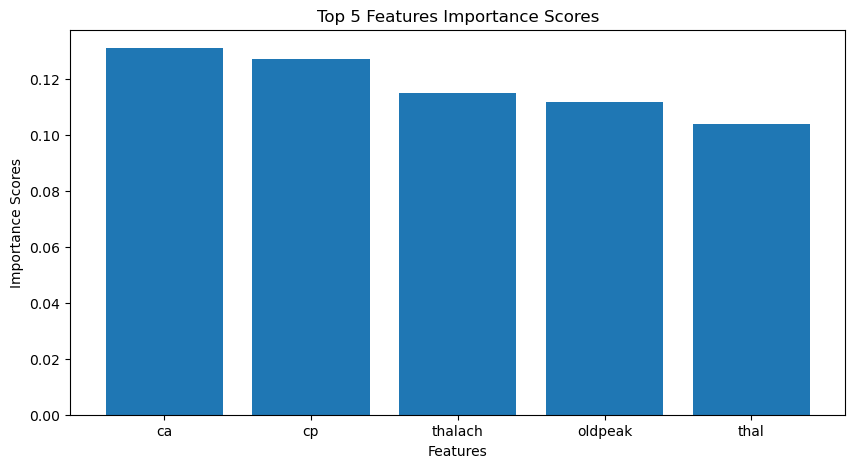

In [13]:
import matplotlib.pyplot as plt

# Get feature importances and feature names
importances = classifier.feature_importances_
feature_names = df.columns[:-1] # exclude the target column

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Get the top 5 feature importances and their corresponding names
top_importances = importances[sorted_idx][:5]
top_feature_names = feature_names[sorted_idx][:5]

# Plot the feature importances as a bar chart
plt.figure(figsize=(10,5))
plt.bar(top_feature_names, top_importances)
plt.title("Top 5 Features Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance Scores")
plt.show()


## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Ans: 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [17]:
classifier=RandomForestClassifier()
grid=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5,scoring='accuracy')

In [18]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [19]:
grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [20]:
best_model=grid.best_estimator_

In [21]:
accuracy=best_model.score(X_test,y_test)
print(accuracy)

0.8131868131868132


## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
Ans: 


In [3]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
df=pd.read_csv('dataset.csv')
X=df.drop(labels=['target'],axis=1)
y=df.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
classifier= RandomForestClassifier(random_state=42)

grid = GridSearchCV(estimator=classifier, param_grid=param, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
classifier = RandomForestClassifier(random_state=42, **best_param)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(prec)
print(rec)
print(f1)

## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

Ans:Z